In [106]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
from sklearn.metrics import  roc_curve, auc ,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [107]:
pima = pd.read_csv('Data/diabetes.csv', sep=';')
df = pd.read_csv('Data/diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('Data/diabetes_pt2.csv', sep=';')

/tmp/ipykernel_42709/332813748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outcome', data=pima, palette="Set2")


Text(0, 0.5, 'Number of People')

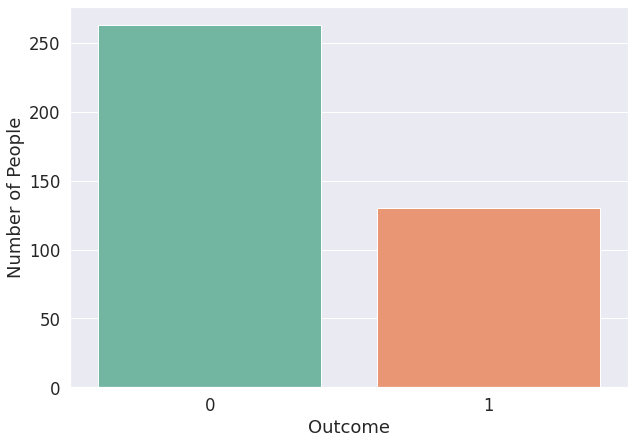

In [108]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

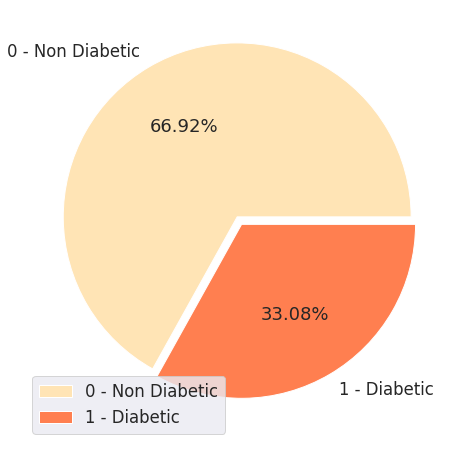

In [109]:
plt.figure(figsize=(8,8))
pieC = pima['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

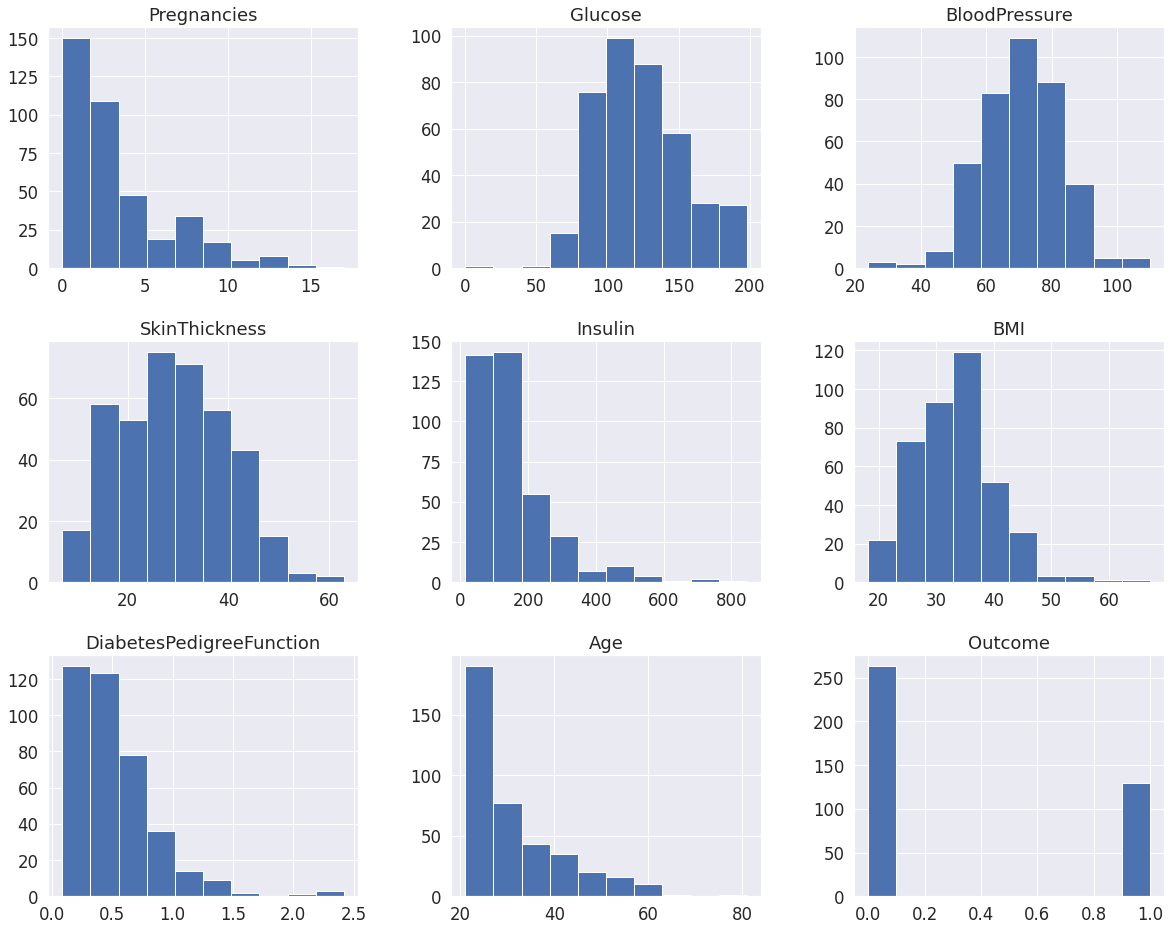

In [110]:
pima.hist(figsize = (20,16),grid=True)

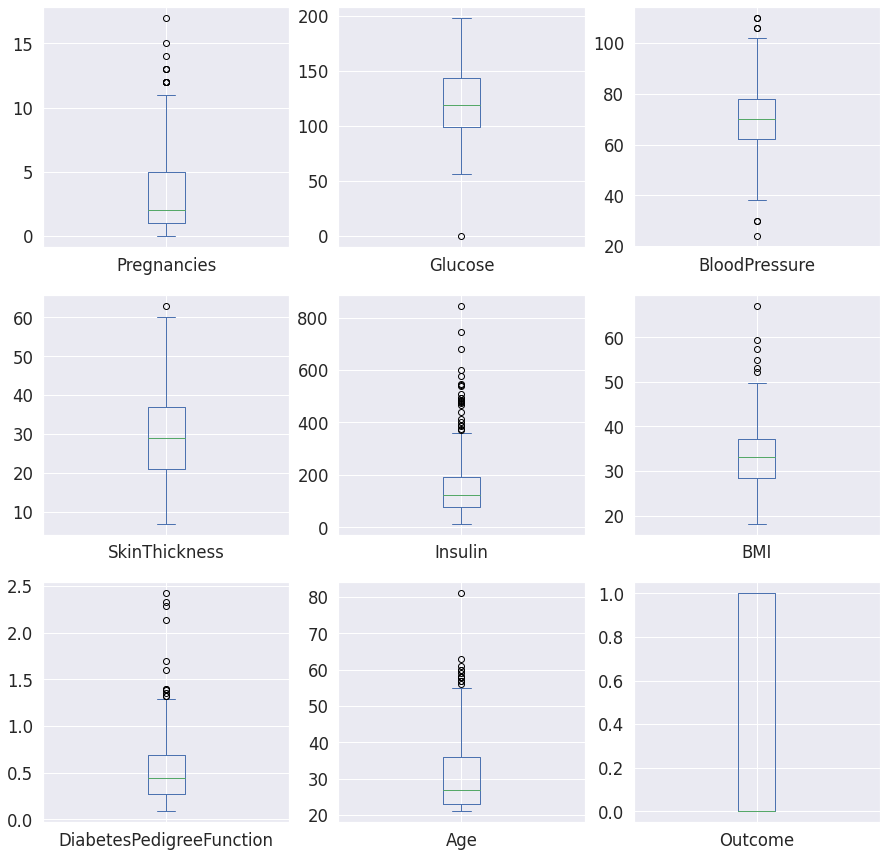

In [111]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

In [112]:
# plt.figure(figsize=(15,6))
# sns.set(font_scale = 1.5)
# sns.countplot(pima['Pregnancies'])
# plt.ylabel('Number of People')

/tmp/ipykernel_42709/2277464663.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
/tmp/ipykernel_42709/2277464663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
/tmp/ipykernel_42709/2277464663.py:

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

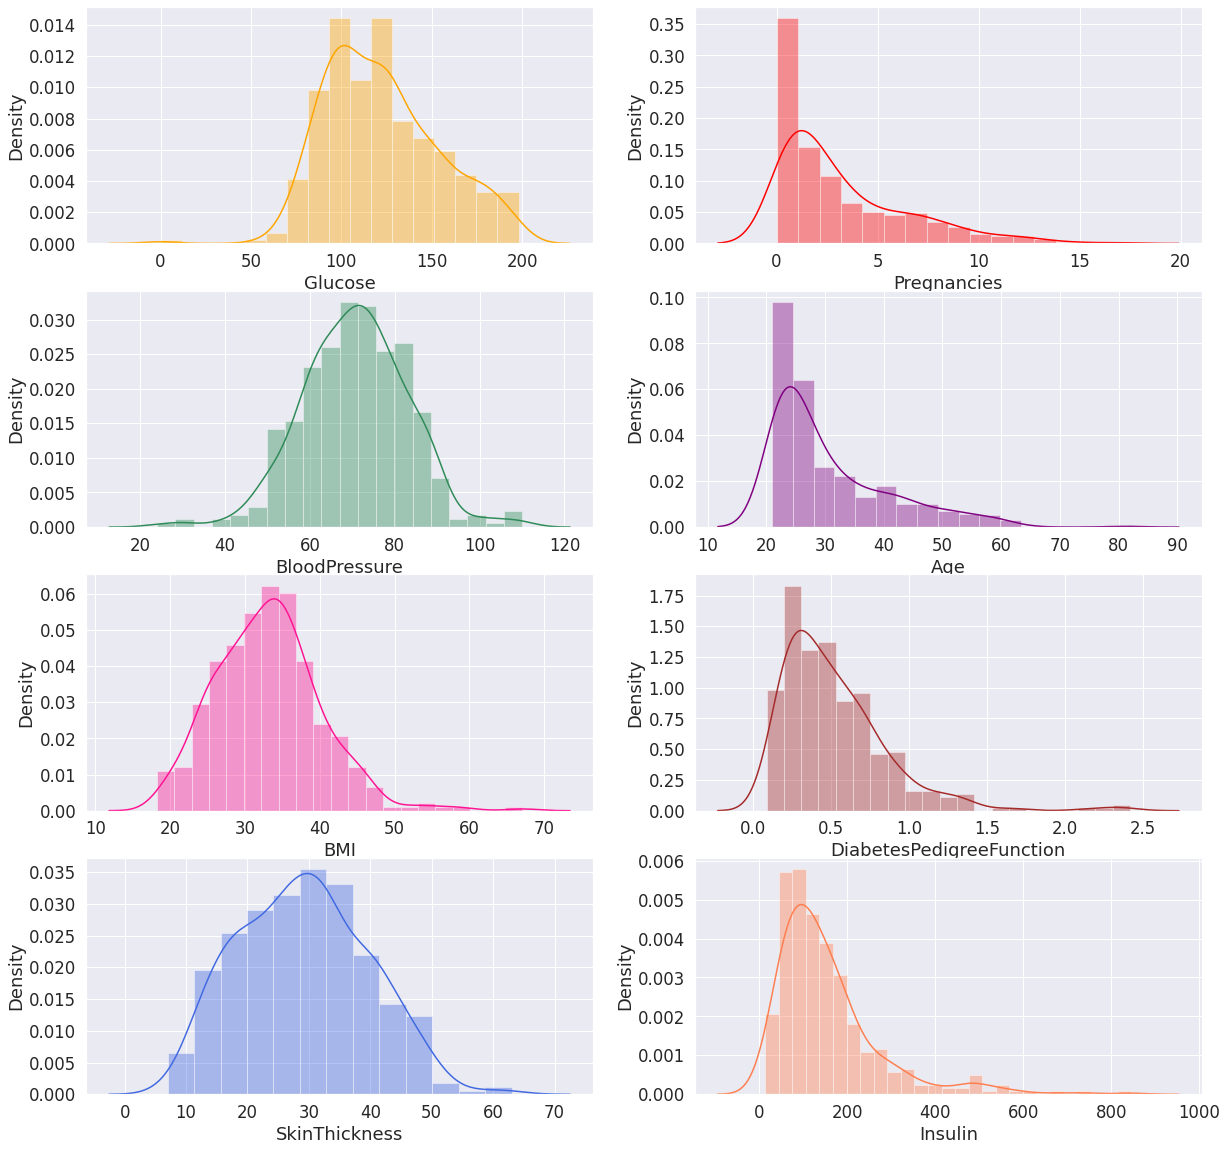

In [113]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.set(font_scale = 1)
sns.distplot(pima.Glucose, ax = ax[0,0], color = 'orange')
sns.distplot(pima.Pregnancies, ax = ax[0,1], color = 'red')
sns.distplot(pima.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(pima.Age, ax = ax[1,1], color = 'purple')
sns.distplot(pima.BMI, ax = ax[2,0], color = 'deeppink')
sns.distplot(pima.DiabetesPedigreeFunction, ax = ax[2,1], color = 'brown')
sns.distplot(pima.SkinThickness, ax = ax[3,0], color = 'royalblue')
sns.distplot(pima.Insulin, ax = ax[3,1], color = 'coral')

<AxesSubplot:>

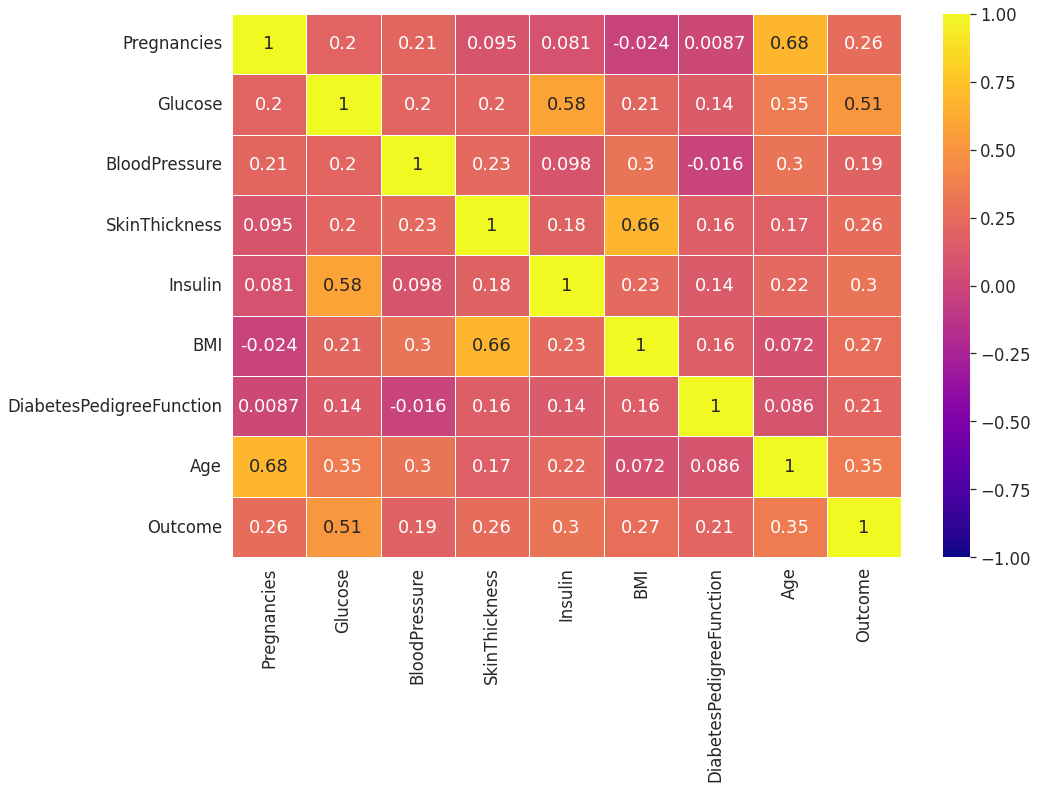

In [114]:
corr = pima.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

Jakieś moje dziwne próby to jest raczej źle bo muszę zrobić prior predictive check tu jest za duzo tego

In [115]:
with open('Stan/population_0.stan', 'r') as f: 

   print(f.read())

model_ppc=CmdStanModel(stan_file='Stan/population_0.stan')

R = 1000
sim_data = model_ppc.sample(data={'N': 1000},
                        iter_sampling=393, 
                        iter_warmup=1,
                        refresh=R,
                        fixed_param=True,
                        chains=1)

# Pobranie wyników
whot = sim_data.draws_pd()
print(whot[['glucose', 'age', 'bmi']].head())

INFO:cmdstanpy:compiling stan file /GA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0.stan to exe file /GA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0


data {
  int<lower=0> N;  // liczba symulacji
}

generated quantities {
  real glucose = normal_rng(110, 25);
  real age_base = 21;  // Wiek zaczyna się od 21 lat
  real lambda_age = 0.085;  // Parametr lambda dla rozkładu wykładniczego
  real age = age_base + exponential_rng(lambda_age);  // Wiek z rozkładu wykładniczego, przesunięty o bazowy wiek 21 lat
  real bmi = normal_rng(33, 6);
  real blood_pressure = normal_rng(75, 12);
  real pregnancies = exponential_rng(0.283);
  real insulin = normal_rng(130, 60);
  //real pregnancies = poisson_rng(1.5);
}


INFO:cmdstanpy:compiled model executable: /GA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/population_0
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



    glucose      age      bmi
0   88.8234  30.2761  30.1736
1   87.4845  32.2603  30.9705
2   62.7358  22.0213  37.7778
3  140.2420  36.6375  28.5601
4   93.4477  27.4401  38.9734


In [116]:
print(whot)

     lp__  accept_stat__   glucose  age_base  lambda_age      age      bmi  \
0     0.0            0.0   88.8234      21.0       0.085  30.2761  30.1736   
1     0.0            0.0   87.4845      21.0       0.085  32.2603  30.9705   
2     0.0            0.0   62.7358      21.0       0.085  22.0213  37.7778   
3     0.0            0.0  140.2420      21.0       0.085  36.6375  28.5601   
4     0.0            0.0   93.4477      21.0       0.085  27.4401  38.9734   
..    ...            ...       ...       ...         ...      ...      ...   
388   0.0            0.0  146.5450      21.0       0.085  21.4282  34.3002   
389   0.0            0.0  130.5950      21.0       0.085  24.4752  43.2033   
390   0.0            0.0  124.8150      21.0       0.085  35.8503  36.3148   
391   0.0            0.0  153.8660      21.0       0.085  25.0839  24.9107   
392   0.0            0.0  106.8780      21.0       0.085  47.5027  30.9993   

     blood_pressure  pregnancies   insulin  
0           64.457

In [117]:
print(pima)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       89             66             23       94  28.1   
1              0      137             40             35      168  43.1   
2              3       78             50             32       88  31.0   
3              2      197             70             45      543  30.5   
4              1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
388            0      181             88             44      510  43.3   
389            1      128             88             39      110  36.5   
390            2       88             58             26       16  28.4   
391           10      101             76             48      180  32.9   
392            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.167   21        0  
1                  

In [118]:
print("Average number of children had by Pima woman: ", pima['Pregnancies'].mean())
print("Average insulin of Pima woman: ", pima['Insulin'].mean())

Average number of children had by Pima woman:  3.295165394402036
Average insulin of Pima woman:  155.7175572519084


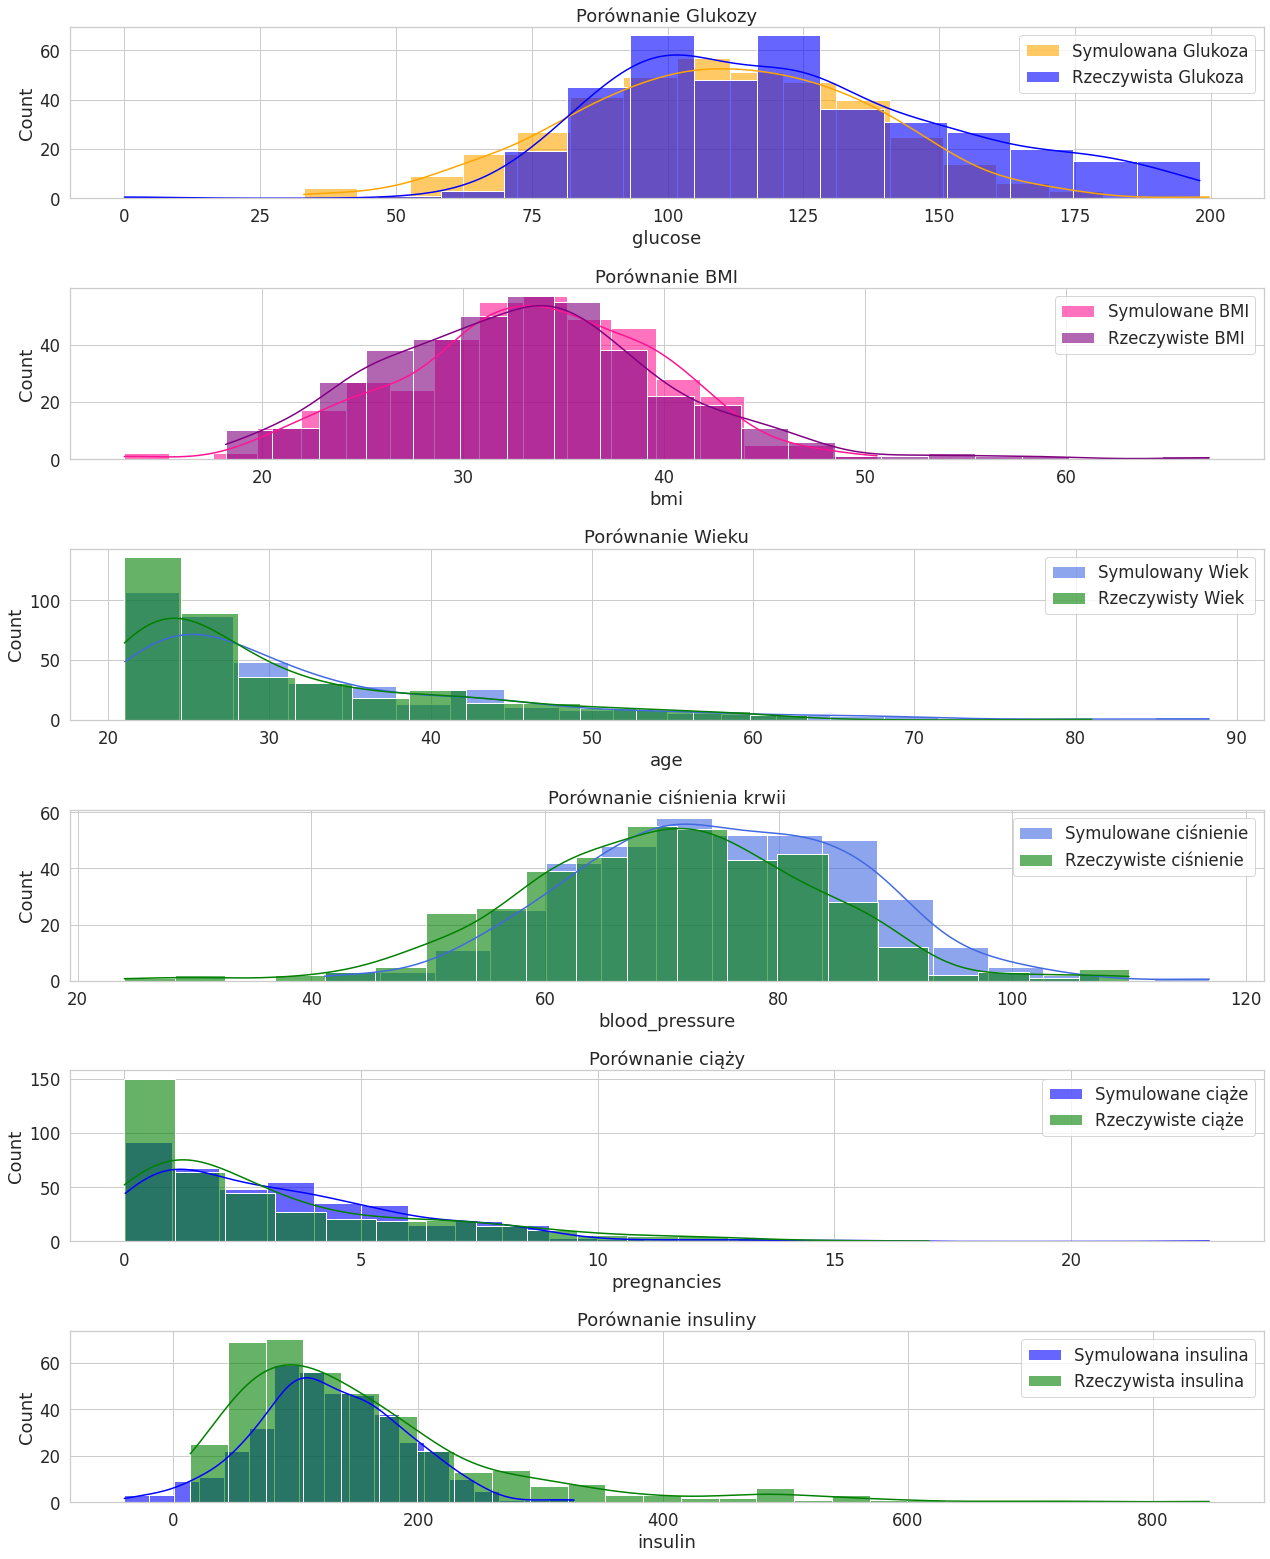

In [119]:
# Ustawienie stylu Seaborn dla lepszego wyglądu
sns.set(style='whitegrid', font_scale=1.5)

# Tworzenie figury i osi dla trzech wykresów
fig, axs = plt.subplots(6, 1, figsize=(18, 22))  # Trzy wykresy jeden pod drugim

# Glukoza
sns.histplot(data=whot, x='glucose', kde=True, color='orange', ax=axs[0], label='Symulowana Glukoza', alpha=0.6)
sns.histplot(data=pima, x='Glucose', kde=True, color='blue', ax=axs[0], label='Rzeczywista Glukoza', alpha=0.6)
axs[0].set_title('Porównanie Glukozy')
axs[0].legend()

# BMI
sns.histplot(data=whot, x='bmi', kde=True, color='deeppink', ax=axs[1], label='Symulowane BMI', alpha=0.6)
sns.histplot(data=pima, x='BMI', kde=True, color='purple', ax=axs[1], label='Rzeczywiste BMI', alpha=0.6)
axs[1].set_title('Porównanie BMI')
axs[1].legend()

# Wiek
sns.histplot(data=whot, x='age', kde=True, color='royalblue', ax=axs[2], label='Symulowany Wiek', alpha=0.6)
sns.histplot(data=pima, x='Age', kde=True, color='green', ax=axs[2], label='Rzeczywisty Wiek', alpha=0.6)
axs[2].set_title('Porównanie Wieku')
axs[2].legend()

# Ciśnienie krwii
sns.histplot(data=whot, x='blood_pressure', kde=True, color='royalblue', ax=axs[3], label='Symulowane ciśnienie', alpha=0.6)
sns.histplot(data=pima, x='BloodPressure', kde=True, color='green', ax=axs[3], label='Rzeczywiste ciśnienie', alpha=0.6)
axs[3].set_title('Porównanie ciśnienia krwii')
axs[3].legend()


# DPF
sns.histplot(data=whot, x='pregnancies', kde=True, color='blue', ax=axs[4], label='Symulowane ciąże', alpha=0.6)
sns.histplot(data=pima, x='Pregnancies', kde=True, color='green', ax=axs[4], label='Rzeczywiste ciąże', alpha=0.6)
axs[4].set_title('Porównanie ciąży')
axs[4].legend()

# Insulin
sns.histplot(data=whot, x='insulin', kde=True, color='blue', ax=axs[5], label='Symulowana insulina', alpha=0.6)
sns.histplot(data=pima, x='Insulin', kde=True, color='green', ax=axs[5], label='Rzeczywista insulina', alpha=0.6)
axs[5].set_title('Porównanie insuliny')
axs[5].legend()

# Formatowanie ogólne
plt.tight_layout()
plt.show()

Dalsza praca

In [120]:
stan_data = {
    'N': len(df),
    'K': len(df.columns) - 1,
    'X': df.drop('Outcome', axis=1).values,
    'y': df['Outcome'].values
}

test_data = {
    'N': len(df_test),
    'K': len(df_test.columns) - 1,
    'X': df_test.drop('Outcome', axis=1).values,
    'y': df_test['Outcome'].values
}

In [121]:
sm = CmdStanModel(stan_file='Stan/code_0.stan') # ten model jest słaby

fit = sm.sample(data=stan_data, iter_sampling=2000, chains=4, iter_warmup=1000, seed=101)

def logit(x):
    return 1 / (1 + np.exp(-x))

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)




chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)



chain 1 |█▌        | 00:00 Iteration:  300 / 3000 [ 10%]  (Warmup)


chain 1 |██▏       | 00:00 Iteration:  500 / 3000 [ 16%]  (Warmup)
chain 1 |██▊       | 00:01 Iteration:  700 / 3000 [ 23%]  (Warmup)

chain 1 |███▍      | 00:01 Iteration:  900 / 3000 [ 30%]  (Warmup)



chain 1 |████▍     | 00:01 Iteration: 1100 / 3000 [ 36%]  (Sampling)




chain 1 |█████     | 00:01 Iteration: 1300 / 3000 [ 43%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 1500 / 3000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:01 Iteration: 1700 / 3000 [ 56%]  (Sampling)


chain 1 |██████▉   | 00:01 Iteration: 1900 / 3000 [ 63%]  (Sampling)


chain 1 |███████▌  | 00:02 Iteration: 2100 / 3000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 2300 / 3000 [ 76%]  (Sampling)


chain 1 |████████▊ | 00:02 Iteration: 2500 / 3000 [ 83%]  (Sampling)



chain 1 |███████


INFO:cmdstanpy:CmdStan done processing.


In [122]:
beta_samples = fit.stan_variable('beta')
alpha_samples = fit.stan_variable('alpha')

beta_mean = np.mean(beta_samples, axis=0)
alpha_mean = np.mean(alpha_samples)

In [123]:
logit_preds = np.dot(test_data['X'], beta_mean) + alpha_mean
preds = logit(logit_preds) > 0.5 

true_labels = test_data['y']

In [124]:
accuracy = accuracy_score(true_labels, preds)
precision = precision_score(true_labels, preds)
recall = recall_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
conf_matrix = confusion_matrix(true_labels, preds)

In [125]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Precision: 0.8260869565217391
Recall: 0.6129032258064516
F1 Score: 0.7037037037037037
Confusion Matrix:
[[65  4]
 [12 19]]


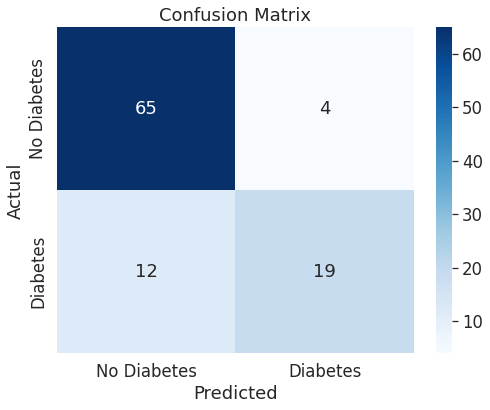

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()